In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt


/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load and preprocess data
df = pd.read_excel('augbal.xlsx')
text = df['Judgment'].values.tolist()
labels = df['Label'].values.tolist()

# Convert labels to numpy array and reshape to match model output shape
labels = np.array(labels).reshape(-1, 1)

# Tokenize text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# Pad sequences
max_length = max([len(seq) for seq in sequences])
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')

# Split data into train and test sets
train_ratio = 0.8
split_idx = int(len(padded_sequences) * train_ratio)
train_sequences = padded_sequences[:split_idx]
train_labels = labels[:split_idx]
test_sequences = padded_sequences[split_idx:]
test_labels = labels[split_idx:]

# Define model architecture
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_length)(input_layer)
dropout_layer = Dropout(0.2)(embedding_layer)
conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(dropout_layer)
pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
lstm_layer = Bidirectional(LSTM(units=64, return_sequences=True))(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_sequences, train_labels, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(test_sequences, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/20
10/10 [==============================] - 12s 857ms/step - loss: 7.4327 - accuracy: 0.1424 - val_loss: 6.6889 - val_accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 7s 661ms/step - loss: 4.9817 - accuracy: 0.1423 - val_loss: 4.5509 - val_accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 7s 666ms/step - loss: 2.5832 - accuracy: 0.1423 - val_loss: 4.5164 - val_accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 7s 663ms/step - loss: 2.0944 - accuracy: 0.1423 - val_loss: 5.4820 - val_accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 7s 662ms/step - loss: 1.9272 - accuracy: 0.1424 - val_loss: 5.4812 - val_accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 7s 664ms/step - loss: 1.7991 - accuracy: 0.1424 - val_loss: 6.2887 - val_accuracy: 0.0000e+00
Epoch 7/20
10/10 [=============================

In [3]:
model.save('trained_model_lstm.h5')

/opt/miniconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


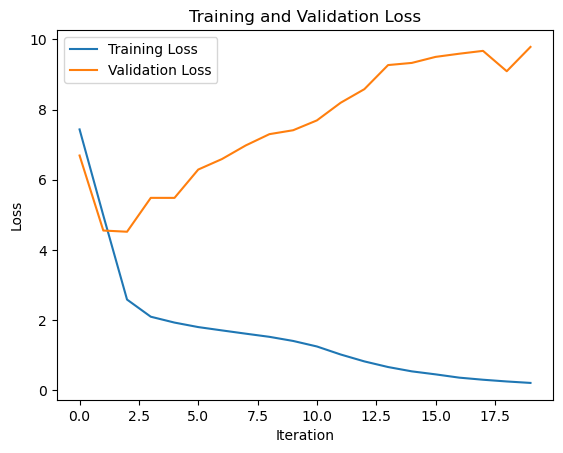

In [4]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

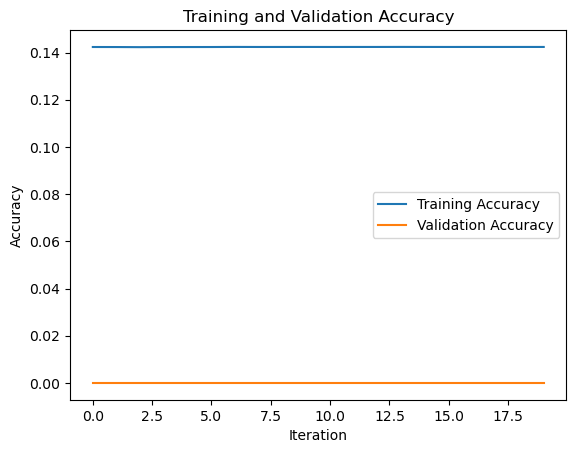

In [5]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4552)]            0         
                                                                 
 embedding (Embedding)       (None, 4552, 128)         2129152   
                                                                 
 dropout (Dropout)           (None, 4552, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, 4550, 64)          24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 2275, 64)          0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 2275, 128)         66048     
 al)                                                         

In [7]:
test_loss, test_acc = model.evaluate(test_sequences, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Get training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Print training and validation accuracy
print('Training accuracy:', train_acc[-1])
print('Validation accuracy:', val_acc[-1])

3/3 [==============================] - 1s 217ms/step - loss: 9.7099 - accuracy: 0.0000e+00
Test loss: 9.709879875183105
Test accuracy: 0.0
Training accuracy: 0.14238479733467102
Validation accuracy: 0.0


In [8]:
import tensorflow as tf

# Load the trained model
loaded_model = tf.keras.models.load_model('trained_model_lstm.h5')



# Preprocess the input data
# judgment = "Your judgment text here"
judgment = judgment.lower()

# Find the domain based on the presence of domain keywords in the judgment
predicted_domain = None
for domain, keywords in domain_keywords.items():
    for keyword in keywords:
        if keyword in judgment:
            predicted_domain = domain
            break
    if predicted_domain:
        break

# If no matching keywords found, use the default domain label
if not predicted_domain:
    predicted_domain = domain_labels[0]

print("Predicted Domain:", predicted_domain)

NameError: name 'judgment' is not defined